<a href="https://colab.research.google.com/github/ifte110/tensorflow-deep-learning-0toM-Self-Practice/blob/main/03_intro_to_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-08-15 10:48:25--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.161.128, 74.125.126.128, 74.125.70.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.161.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   148MB/s    in 0.7s    

2023-08-15 10:48:26 (148 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak

test  train


In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images\
  in {dirpath} .")

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  img = mpimg.imread(target_folder+"/"+ random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"image shape: {img.shape}")



In [ ]:
view_random_image("pizza_steak/train/","steak" )

NameError: ignored

In [ ]:
from tensorflow.python.ops.gen_nn_ops import MaxPool
from keras.api._v2.keras import activations
from warnings import filters
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "/content/pizza_steak/train/"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(train_dir,
                                       batch_size=32, target_size=(224,224),
                                       class_mode="binary",seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                       batch_size=32, target_size=(224,224),
                                       class_mode="binary",seed=42)

model_1 =tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                    kernel_size=3,
                    activation="relu",
                    input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 12s 158ms/step - loss: 0.6235 - accuracy: 0.6560 - val_loss: 0.4945 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 5s 115ms/step - loss: 0.5045 - accuracy: 0.7640 - val_loss: 0.4194 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 7s 143ms/step - loss: 0.4630 - accuracy: 0.7960 - val_loss: 0.4183 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 6s 119ms/step - loss: 0.4349 - accuracy: 0.8087 - val_loss: 0.3746 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 6s 134ms/step - loss: 0.3939 - accuracy: 0.8193 - val_loss: 0.3723 - val_accuracy: 0.8340


In [14]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
from tensorflow.python.ops.gen_nn_ops import MaxPool
from keras.api._v2.keras import activations
from warnings import filters
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "/content/pizza_steak/train/"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(train_dir,
                                       batch_size=32, target_size=(224,224),
                                       class_mode="binary",seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                       batch_size=32, target_size=(224,224),
                                       class_mode="binary",seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

model_2 = Sequential([
    Conv2D(10,3, activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")

])

model_2.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data) ,
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 18s 144ms/step - loss: 0.5965 - accuracy: 0.6993 - val_loss: 0.4477 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 6s 136ms/step - loss: 0.4702 - accuracy: 0.7833 - val_loss: 0.3909 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 5s 108ms/step - loss: 0.4491 - accuracy: 0.7907 - val_loss: 0.4576 - val_accuracy: 0.7840
Epoch 4/5
47/47 [==============================] - 8s 161ms/step - loss: 0.4052 - accuracy: 0.8273 - val_loss: 0.3459 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 6s 117ms/step - loss: 0.3879 - accuracy: 0.8320 - val_loss: 0.3322 - val_accuracy: 0.8640


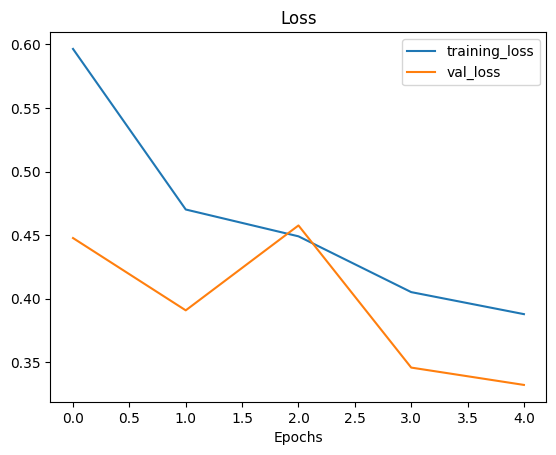

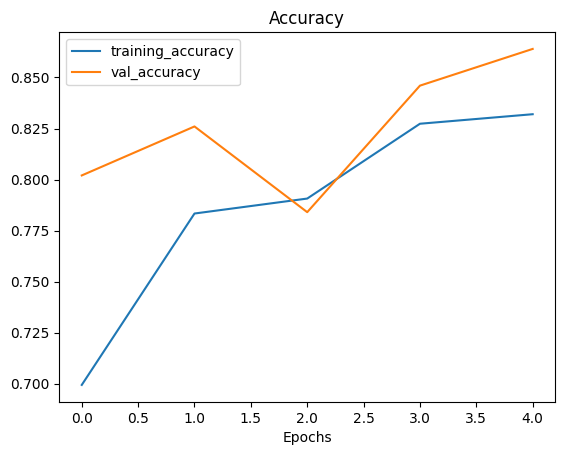

In [ ]:
plot_loss_curves(history_2)

In [ ]:
from tensorflow.python.ops.gen_nn_ops import MaxPool
from keras.api._v2.keras import activations
from warnings import filters
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
train_data_aug = ImageDataGenerator(rescale=1/255.,
                                       rotation_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       width_shift_range=0.2,
                                       height_shift_range=0.3,
                                       horizontal_flip=True)


train_datagen = ImageDataGenerator(rescale=1/255.)

valid_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
print('Augmented training Data')

train_dir = "/content/pizza_steak/train/"
test_dir = "pizza_steak/test"

train_data_aug = train_data_aug.flow_from_directory(train_dir,
                                                    target_size=(224,224),
                                                    batch_size=32,
                                                    class_mode="binary",
                                                    shuffle=True)

print("non-Augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)


print("non-Augmented test data")
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",)

Augmented training Data
Found 1500 images belonging to 2 classes.
non-Augmented training data
Found 1500 images belonging to 2 classes.
non-Augmented test data
Found 500 images belonging to 2 classes.


In [ ]:
images, label = train_data.next()
aug_images , aug_labels = train_data_aug.next()

showing image : 17


(-0.5, 223.5, 223.5, -0.5)

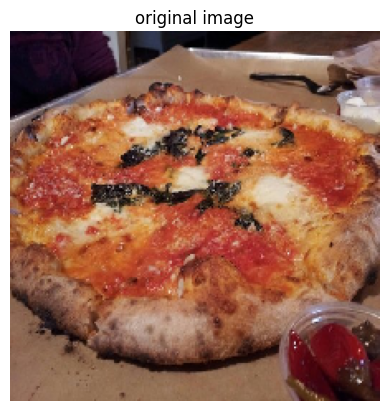

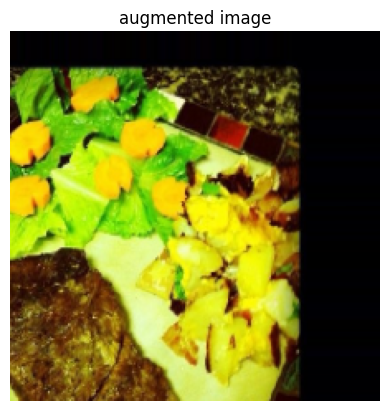

In [ ]:
import random
import matplotlib.pyplot as plt

random_number = random.randint(0,32)
print(f"showing image : {random_number}")
plt.imshow(images[random_number])
plt.title(f"original image")
plt.axis(False)
plt.figure()
plt.imshow(aug_images[random_number])
plt.title(f"augmented image")
plt.axis(False)

In [ ]:
# Create the model (same as model_5)
model_3 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data_aug, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_aug),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 32s 446ms/step - loss: 0.6330 - accuracy: 0.6333 - val_loss: 0.6401 - val_accuracy: 0.6380
Epoch 2/5
47/47 [==============================] - 20s 433ms/step - loss: 0.5745 - accuracy: 0.7060 - val_loss: 0.4215 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 22s 461ms/step - loss: 0.5352 - accuracy: 0.7373 - val_loss: 0.4031 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 32s 673ms/step - loss: 0.4953 - accuracy: 0.7607 - val_loss: 0.3806 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 19s 415ms/step - loss: 0.4745 - accuracy: 0.7733 - val_loss: 0.3838 - val_accuracy: 0.8260


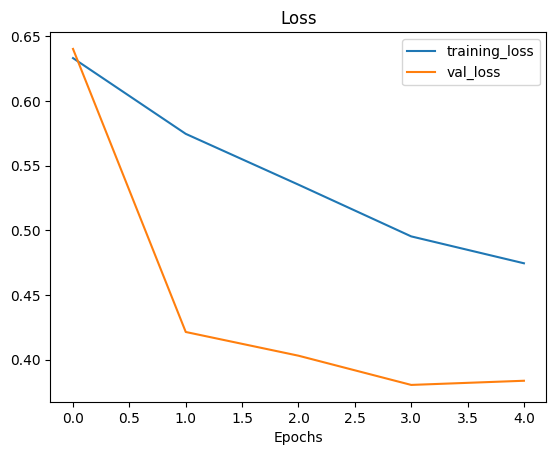

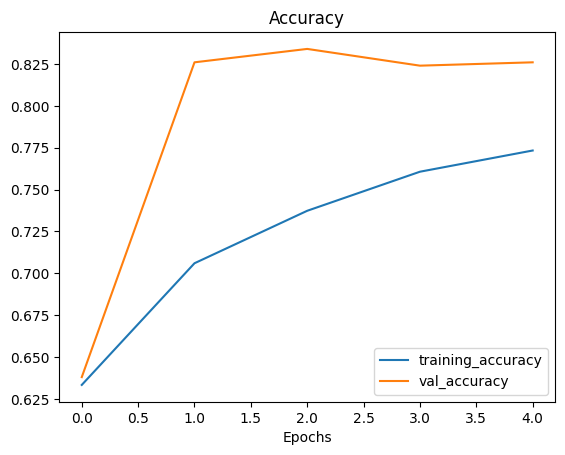

In [ ]:
plot_loss_curves(history_3)

In [ ]:
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

steak = mpimg.imread("03-steak.jpeg")

--2023-08-15 10:53:22--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2023-08-15 10:53:22 (32.8 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

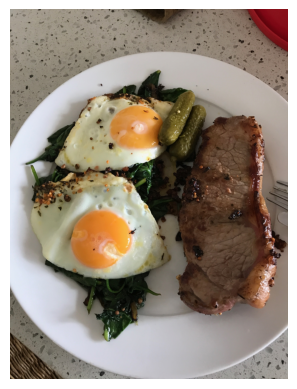

In [ ]:
plt.imshow(steak)
plt.axis(False)

In [ ]:
steak.shape

(4032, 3024, 3)

In [43]:
import tensorflow as tf

def load_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, [img_shape, img_shape])
  img= img/255.
  return img


In [ ]:
steak = load_prep_image("03-steak.jpeg")

steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred =model_3.predict(tf.expand_dims(steak,axis=0))
pred

1/1 [==============================] - 0s 92ms/step


array([[0.9409428]], dtype=float32)

In [ ]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [40]:
def pred_and_plot(model,filename,class_names):
  img = load_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred))]


  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)


1/1 [==============================] - 0s 18ms/step


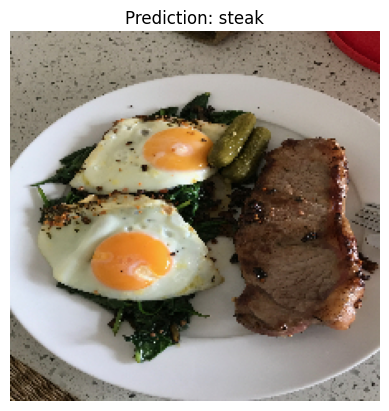

In [ ]:
pred_and_plot(model_3,"03-steak.jpeg",class_names)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

!wget https://raw.githubusercontent.com/ifte110/tensorflow-deep-learning-0toM/main/images/03-pizza-dad.jpeg

pizza = mpimg.imread("03-pizza-dad.jpeg")


--2023-08-15 11:13:45--  https://raw.githubusercontent.com/ifte110/tensorflow-deep-learning-0toM/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.2’

03-pizza-dad.jpeg.2 100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2023-08-15 11:13:45 (43.0 MB/s) - ‘03-pizza-dad.jpeg.2’ saved [2874848/2874848]



1/1 [==============================] - 0s 19ms/step


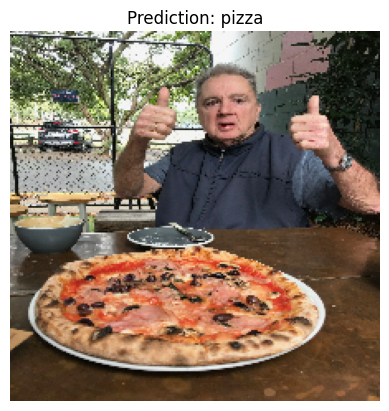

In [ ]:
pred_and_plot(model_3, "03-pizza-dad.jpeg", class_names)

1/1 [==============================] - 0s 29ms/step


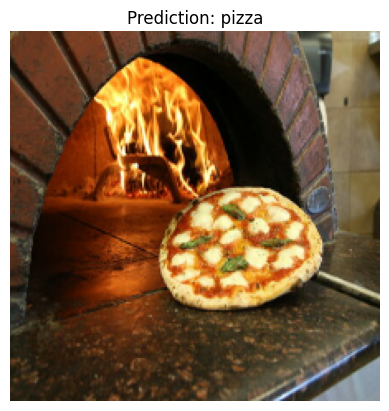

In [ ]:
pred_and_plot(model_3, "pizza-test.jpg", class_names)

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip


--2023-08-15 19:10:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.125.128, 142.250.136.128, 142.250.148.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   292MB/s    in 1.7s    

2023-08-15 19:10:37 (292 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

In [3]:
import os

for dirpath, dirnames, filenames, in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/train'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'
There are 1

In [4]:
train_dir = "/content/10_food_classes_all_data/train/"
test_dir = "/content/10_food_classes_all_data/test/"

In [5]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names =np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['1270986.jpg']
image shape: (512, 512, 3)


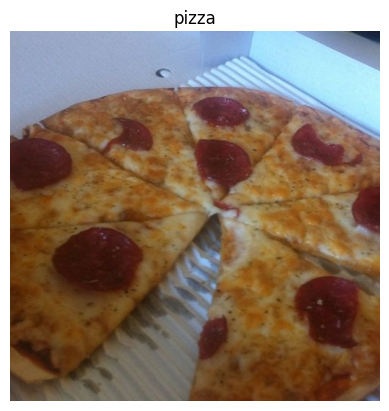

In [8]:
import random
img = view_random_image(train_dir, target_class=random.choice(class_names))

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical",
                                               shuffle=True)

test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical",
                                               shuffle=True)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [19]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras.models import Sequential


model_4 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])


model_4.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [22]:
history_4 = model_4.fit(train_data, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 27s 114ms/step - loss: 2.1828 - accuracy: 0.1929 - val_loss: 2.0460 - val_accuracy: 0.2616
Epoch 2/5
235/235 [==============================] - 27s 115ms/step - loss: 1.8902 - accuracy: 0.3412 - val_loss: 1.9717 - val_accuracy: 0.2952
Epoch 3/5
235/235 [==============================] - 28s 118ms/step - loss: 1.5060 - accuracy: 0.4968 - val_loss: 2.1039 - val_accuracy: 0.2820
Epoch 4/5
235/235 [==============================] - 26s 112ms/step - loss: 0.9709 - accuracy: 0.6912 - val_loss: 2.4016 - val_accuracy: 0.2720
Epoch 5/5
235/235 [==============================] - 28s 118ms/step - loss: 0.5172 - accuracy: 0.8509 - val_loss: 3.0156 - val_accuracy: 0.2724


In [21]:
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 29160)             0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [24]:
model_4.evaluate(test_data)

79/79 [==============================] - 6s 81ms/step - loss: 3.0156 - accuracy: 0.2724


[3.0156304836273193, 0.27239999175071716]

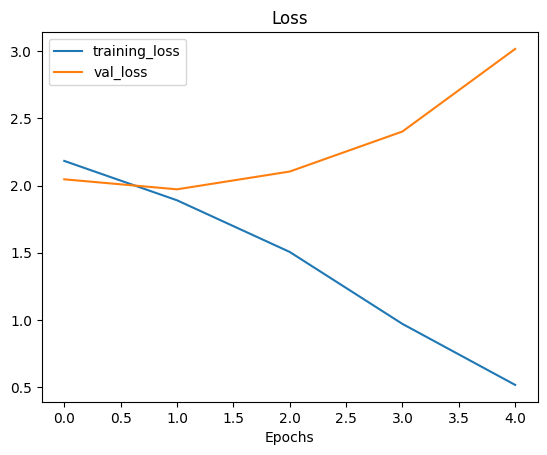

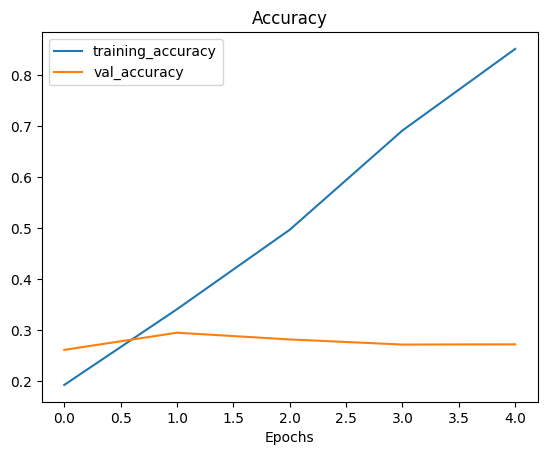

In [23]:
plot_loss_curves(history_4)

In [32]:
train_datagen_aug = ImageDataGenerator(rescale =1/255.,
                                       rotation_range=0.2,
                                       width_shift_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True)

train_data_aug = train_datagen_aug.\
flow_from_directory(train_dir,
                    target_size=(224,224),
                    batch_size=32,
                    class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [33]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras.models import Sequential


model_5 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])


model_5.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [34]:
history_5 = model_5.fit(train_data_aug, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_aug),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 105s 433ms/step - loss: 2.1902 - accuracy: 0.1924 - val_loss: 2.0336 - val_accuracy: 0.2764
Epoch 2/5
235/235 [==============================] - 103s 437ms/step - loss: 2.0699 - accuracy: 0.2675 - val_loss: 1.9295 - val_accuracy: 0.3296
Epoch 3/5
235/235 [==============================] - 102s 432ms/step - loss: 1.9961 - accuracy: 0.3053 - val_loss: 1.9036 - val_accuracy: 0.3348
Epoch 4/5
235/235 [==============================] - 103s 437ms/step - loss: 1.9466 - accuracy: 0.3249 - val_loss: 1.8517 - val_accuracy: 0.3568
Epoch 5/5
235/235 [==============================] - 100s 425ms/step - loss: 1.9109 - accuracy: 0.3369 - val_loss: 1.7444 - val_accuracy: 0.4020


In [35]:
model_5.evaluate(test_data)

79/79 [==============================] - 8s 98ms/step - loss: 1.7444 - accuracy: 0.4020


[1.744367241859436, 0.4020000100135803]

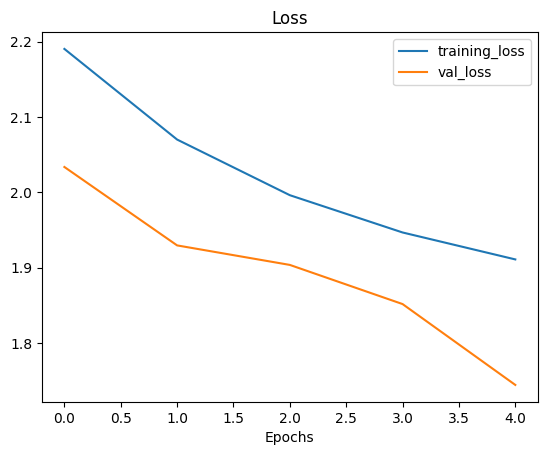

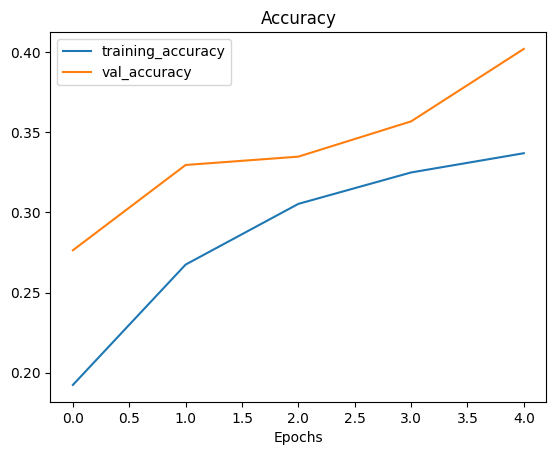

In [36]:
plot_loss_curves(history_5)

In [37]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [39]:
!wget https://raw.githubusercontent.com/ifte110/tensorflow-deep-learning-0toM/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/ifte110/tensorflow-deep-learning-0toM/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/ifte110/tensorflow-deep-learning-0toM/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/ifte110/tensorflow-deep-learning-0toM/main/images/03-steak.jpeg


--2023-08-15 20:30:03--  https://raw.githubusercontent.com/ifte110/tensorflow-deep-learning-0toM/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2023-08-15 20:30:03 (43.2 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]

--2023-08-15 20:30:03--  https://raw.githubusercontent.com/ifte110/tensorflow-deep-learning-0toM/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent

In [72]:
def pred_and_plot(model,filename,class_names):
  img = load_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]


  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 25ms/step


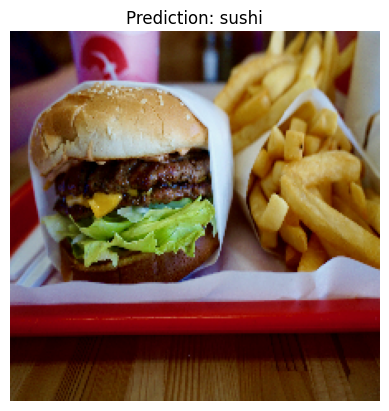

In [77]:
pred_and_plot(model_5, filename="03-hamburger.jpeg",
              class_names=class_names)